In [926]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [927]:
coffee = pd.read_excel('data/ÏõêÎëê ÏÉùÏÇ∞Îüâ.xlsx')
data = pd.read_excel('data/ÌéòÎ†àÏù¥Îùº.xlsx')

In [928]:
coffee.head()
coffee.tail()

Area         Element  Item Code (CPC)  Year Code  Year   Unit  \
37  Colombia           Yield             1610       2022  2022  kg/ha   
38  Colombia      Production             1610       2022  2022      t   
39  Colombia  Area harvested             1610       2023  2023     ha   
40  Colombia           Yield             1610       2023  2023  kg/ha   
41  Colombia      Production             1610       2023  2023      t   

        Value  
37     789.40  
38  665015.95  
39  841354.00  
40     809.20  
41  680857.67

In [929]:
data.head()

ÏßÄÏ†ê        ÏßÄÏ†êÎ™Ö    ÏãúÍ∞Ñ(UTC)  ÏõîÌèâÍ∑† Í∏∞Ïò®  ÏùºÌèâÍ∑† Í∏∞Ïò®Ïùò ÏõîÌëúÏ§ÄÌé∏Ï∞®  ÏõîÌèâÍ∑† ÏùºÏµúÍ≥†Í∏∞Ïò®  ÏõîÌèâÍ∑† ÏùºÏµúÏ†ÄÍ∏∞Ïò®  \
0  80210  ÌéòÎ†àÏù¥Îùº/ÎßàÌÖåÏπ¥ÎÇò 2010-01-31    23.5            0.7       29.1       18.3   
1  80210  ÌéòÎ†àÏù¥Îùº/ÎßàÌÖåÏπ¥ÎÇò 2010-02-28    23.9            0.7       28.9       18.9   
2  80210  ÌéòÎ†àÏù¥Îùº/ÎßàÌÖåÏπ¥ÎÇò 2010-03-31    23.5            0.6       28.4       18.8   
3  80210  ÌéòÎ†àÏù¥Îùº/ÎßàÌÖåÏπ¥ÎÇò 2010-04-30    22.0            1.2       25.8       18.3   
4  80210  ÌéòÎ†àÏù¥Îùº/ÎßàÌÖåÏπ¥ÎÇò 2010-05-31    22.3            1.3       27.0       18.5   

   ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ  ÏõîÏ§ë ÏµúÎåÄÌíçÏÜç  ÏõîÏ§ë ÏµúÎåÄÌíçÏÜç ÎÇ†  ÏõîÏùºÏ°∞ÏãúÍ∞Ñ  
0     11.3      8.6        NaN  241.0  
1     25.2      8.3       23.0  159.0  
2     37.9     12.2       10.0  174.0  
3     83.4     13.6        3.0  122.0  
4     65.8      7.8       14.0  149.0

In [930]:
# ÏõêÌïòÎäî Ïª¨ÎüºÎßå ÏÑ†ÌÉù
UTC_rain = data[['ÏãúÍ∞Ñ(UTC)','ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ']]
UTC_rain = UTC_rain.set_index('ÏãúÍ∞Ñ(UTC)')
UTC_rain.head()

ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ
ÏãúÍ∞Ñ(UTC)            
2010-01-31     11.3
2010-02-28     25.2
2010-03-31     37.9
2010-04-30     83.4
2010-05-31     65.8

Í≤∞Ï∏°Ïπò <hr>

In [931]:
UTC_rain.isnull().sum()

ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ    24
dtype: int64

In [932]:
# Í≤∞Ï∏°ÏπòÎ•º Í∞ïÏàòÎüâ ÏõîÌèâÍ∑†Í∞íÏúºÎ°ú Ï±ÑÏö∞Í∏∞
# Í∞ïÏàòÎüâ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÍ≤Ω
data['ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ'] = data['ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ'].astype('float')

# Ïó∞ÎèÑ, Ïõî Í∞í Ïª¨Îüº ÏÉùÏÑ±
data['Ïõî'] = data['ÏãúÍ∞Ñ(UTC)'].dt.month
data['Ïó∞ÎèÑ'] = data['ÏãúÍ∞Ñ(UTC)'].dt.year
month_rain = data.groupby('Ïõî')['ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ'].mean()
month_rain = list(map(int, month_rain)) 

for idx in range(len(data)):
    if pd.isnull(data.loc[idx, 'ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ']):
        for month in range(1,13):
            if data.loc[idx, 'Ïõî'] == month:
                data.loc[idx,'ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ'] = month_rain[month-1]

In [933]:
# 2016ÎÖÑ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("2016ÎÖÑ Îç∞Ïù¥ÌÑ∞ Ïàò:")
print(data[data['Ïó∞ÎèÑ'] == 2016]['ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ'].count())

print("\n2016ÎÖÑ Í≤∞Ï∏°Ïπò Ïàò:")
print(data[data['Ïó∞ÎèÑ'] == 2016]['ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ'].isnull().sum())

print("\n2016ÎÖÑ ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞:")
print(data[data['Ïó∞ÎèÑ'] == 2016].groupby('Ïõî')['ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ'].mean())

2016ÎÖÑ Îç∞Ïù¥ÌÑ∞ Ïàò:
12

2016ÎÖÑ Í≤∞Ï∏°Ïπò Ïàò:
0

2016ÎÖÑ ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞:
Ïõî
1     13.4
2     36.7
3     18.6
4      4.5
5      6.8
6     45.0
7     37.0
8     39.0
9     40.0
10    61.0
11    59.0
12    46.0
Name: ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ, dtype: float64


ÏÉùÏÇ∞ÎüâÍ≥º ÎÖÑ ÌèâÍ∑† Í∞ïÏàòÎüâ <hr>

In [934]:
UTC_rain = data[['ÏãúÍ∞Ñ(UTC)','ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ']]

In [935]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
# 1. Ïª§Ìîº ÏÉùÏÇ∞Îüâ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨            # Î©¥Ï†ÅÎãπ ÏàòÌôïÎüâ ÏÑ†ÌÉù
coffee_prod = coffee[coffee['Element'] == 'Yield']
coffee_yearly = coffee_prod.set_index('Year')['Value']

# 2. ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ - Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
UTC_rain = data[['ÏãúÍ∞Ñ(UTC)', 'ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ']].copy()
UTC_rain['Ïó∞ÎèÑ'] = UTC_rain['ÏãúÍ∞Ñ(UTC)'].dt.year
yearly_rain = UTC_rain.groupby('Ïó∞ÎèÑ')['ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ'].mean()

In [936]:
# ÌèâÍ∑† ÌôïÏù∏
yearly_rain
yearly_rain.info()

<class 'pandas.core.series.Series'>
Index: 16 entries, 2010 to 2025
Series name: ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ
Non-Null Count  Dtype  
--------------  -----  
16 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [937]:
# # Ïù∏Îç±Ïä§ ÌÉÄÏûÖ Î≥ÄÌôò
# coffee_yearly.index = coffee_yearly.index.astype(int)
# yearly_rain.index = yearly_rain.index.astype(int)
# yearly_rain.dtype

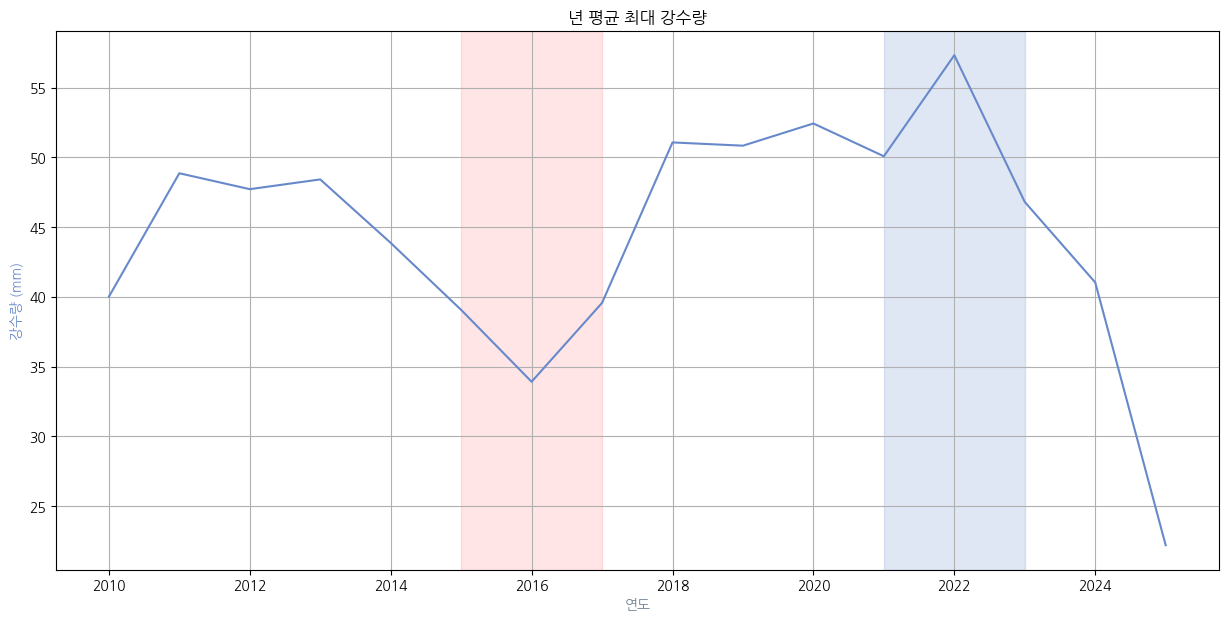

In [938]:
plt.figure(figsize=(15, 7))

plt.plot(yearly_rain.index, yearly_rain.values, '#6789CA', label='ÌèâÍ∑† ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ')

plt.axvspan(2015, 2017, color='r', alpha=0.1)
plt.axvspan(2021, 2023, color='#6789CA', alpha=0.2)

# ax2.axhspan(2020, color='r', alpha=0.1)

plt.title('ÎÖÑ ÌèâÍ∑† ÏµúÎåÄ Í∞ïÏàòÎüâ')
plt.xlabel('Ïó∞ÎèÑ', color='#708090')
plt.ylabel('Í∞ïÏàòÎüâ (mm)', color='#6789CA')

plt.grid(True)
plt.show()

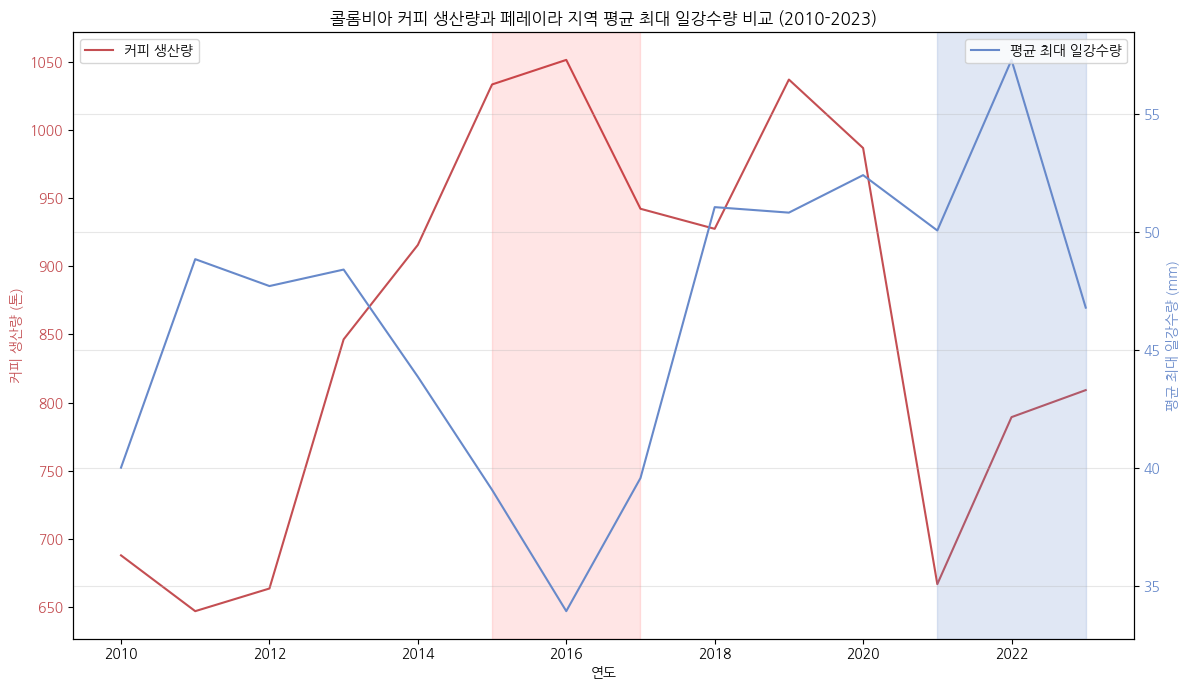

In [939]:
# 2010-2023ÎÖÑ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
coffee_filtered = coffee_yearly.loc[2010:2023]
rain_filtered = yearly_rain.loc[2010:2023]

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
plt.figure(figsize=(12, 7))

ax1 = plt.gca()  # ÌòÑÏû¨ Axes Í∞ÄÏ†∏Ïò§Í∏∞
ax1.plot(coffee_filtered.index, coffee_filtered.values, '#C44E52', label='Ïª§Ìîº ÏÉùÏÇ∞Îüâ')
ax1.set_xlabel('Ïó∞ÎèÑ')
ax1.set_ylabel('Ïª§Ìîº ÏÉùÏÇ∞Îüâ (ÌÜ§)', color='#C44E52')
ax1.tick_params(axis='y', labelcolor='#C44E52')

ax2 = ax1.twinx()  # Îëê Î≤àÏß∏ yÏ∂ï
ax2.plot(rain_filtered.index, rain_filtered.values, '#6789CA', label='ÌèâÍ∑† ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ')
ax2.set_ylabel('ÌèâÍ∑† ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ (mm)', color='#6789CA')
ax2.tick_params(axis='y', labelcolor='#6789CA')

# Î≤îÎ°Ä ÏÑ§Ï†ï
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.axvspan(2015, 2017, color='r', alpha=0.1)
plt.axvspan(2021, 2023, color='#6789CA', alpha=0.2)

plt.title('ÏΩúÎ°¨ÎπÑÏïÑ Ïª§Ìîº ÏÉùÏÇ∞ÎüâÍ≥º ÌéòÎ†àÏù¥Îùº ÏßÄÏó≠ ÌèâÍ∑† ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ ÎπÑÍµê (2010-2023)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [940]:
# Ïª§Ìîº ÏÉùÏÇ∞ÎüâÍ≥º ÌèâÍ∑† ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = coffee_filtered.corr(rain_filtered)

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï∂úÎ†•
print(f'ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation}')

ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.3020292125748813


Í∑∏ÎûòÌîÑÎ•º Î≥¥Î©¥ Îã§ÏùåÍ≥º Í∞ôÏùÄ Í¥ÄÍ≥ÑÎ•º Î≥º Ïàò ÏûàÏäµÎãàÎã§:
1. Ïª§Ìîº ÏÉùÏÇ∞Îüâ (ÌååÎûÄÏÉâ ÏÑ†):
2010-2012ÎÖÑ: Í∞êÏÜå Ï∂îÏÑ∏
2012-2014ÎÖÑ: Í∏âÍ≤©Ìïú Ï¶ùÍ∞Ä
2014ÎÖÑ Ïù¥ÌõÑ: Î≥ÄÎèôÏÑ±ÏùÑ Î≥¥Ïù¥Î©∞ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Í∞êÏÜå Ï∂îÏÑ∏
2020ÎÖÑ Ïù¥ÌõÑ: Îã§Ïãú ÏÜåÌè≠ Ï¶ùÍ∞Ä
2. ÌèâÍ∑† ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ (Îπ®Í∞ÑÏÉâ ÏÑ†):
Ïó∞ÎèÑÎ≥ÑÎ°ú ÌÅ∞ Î≥ÄÎèôÏÑ±ÏùÑ Î≥¥ÏûÑ
ÌäπÌûà 2011ÎÖÑÍ≥º 2017ÎÖÑÏóê ÎÜíÏùÄ Í∞ïÏàòÎüâ Í∏∞Î°ù
ÏµúÍ∑º Îì§Ïñ¥ Í∞ïÏàòÎüâÏùò Î≥ÄÎèôÌè≠Ïù¥ Ïª§Ïßê
3. Îëê Î≥ÄÏàòÏùò Í¥ÄÍ≥Ñ:
Í∞ïÏàòÎüâÏù¥ Îß§Ïö∞ ÎÜíÏùÑ Îïå (Ïòà: 2011ÎÖÑ) Ïª§Ìîº ÏÉùÏÇ∞ÎüâÏù¥ Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•
Í∑πÎã®Ï†ÅÏù∏ Í∞ïÏàòÎüâÏùÄ Ïª§Ìîº ÏÉùÏÇ∞Ïóê Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Ïàò ÏûàÏùå
ÌïòÏßÄÎßå Ï†ÅÏ†àÌïú Í∞ïÏàòÎüâÏùÄ ÏÉùÏÇ∞Ïóê ÌïÑÏöîÌïòÎØÄÎ°ú, Îã®ÏàúÌïú Î∞òÎπÑÎ°Ä Í¥ÄÍ≥ÑÎäî ÏïÑÎãò
Ïù¥ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Í≥ºÎèÑÌïú Í∞ïÏàòÎüâÏùÄ Ïª§Ìîº ÏÉùÏÇ∞Ïóê Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Ïàò ÏûàÏúºÎÇò, ÏÉùÏÇ∞Îüâ Î≥ÄÌôîÏóêÎäî Í∞ïÏàòÎüâ Ïô∏ÏóêÎèÑ Îã§Î•∏ Ïó¨Îü¨ ÏöîÏù∏Îì§Ïù¥ Î≥µÌï©Ï†ÅÏúºÎ°ú ÏûëÏö©ÌïúÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

ÎÖÑ ÏÉùÏÇ∞ÎüâÍ≥º Ïõî Í∞ïÏàòÎüâ <hr>

Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [941]:
# 1. Ïª§Ìîº ÏÉùÏÇ∞Îüâ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
# 'Element' Ïª¨ÎüºÏóêÏÑú 'Yield' Í∞íÎßå ÌïÑÌÑ∞ÎßÅÌïòÏó¨ Ïª§Ìîº ÏÉùÏÇ∞Îüâ Îç∞Ïù¥ÌÑ∞Îßå ÎÇ®Í∏∞Í≥†, 
# 'Year'Î•º Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌïòÏó¨ 'Value' (Ïª§Ìîº ÏÉùÏÇ∞Îüâ) Í∞íÏùÑ SeriesÎ°ú ÎßåÎì≠ÎãàÎã§.
coffee_prod = coffee[coffee['Element'] == 'Yield'].set_index('Year')['Value']

# 2. ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
# 'ÏãúÍ∞Ñ(UTC)'Í≥º 'ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ' Ïª¨ÎüºÎßå ÏÑ†ÌÉùÌïòÏó¨, 'ÏãúÍ∞Ñ(UTC)'ÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
UTC_rain = data[['ÏãúÍ∞Ñ(UTC)', 'ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ']]
UTC_rain = UTC_rain.set_index('ÏãúÍ∞Ñ(UTC)')

In [942]:
# ÏõîÎ≥Ñ ÏÉùÏÇ∞Îüâ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
coffee_monthly = pd.DataFrame()  # Îπà Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
for year in coffee_prod.index:  # Ïª§Ìîº ÏÉùÏÇ∞Îüâ Îç∞Ïù¥ÌÑ∞Ïùò Í∞Å Ïó∞ÎèÑÏóê ÎåÄÌï¥ Î∞òÎ≥µ
    monthly_data = pd.DataFrame(
        {'Value': [coffee_prod.loc[year]] * 12},  # Ìï¥Îãπ Ïó∞ÎèÑÏùò Ïª§Ìîº ÏÉùÏÇ∞ÎüâÏùÑ 12Í∞úÏõîÏóê Í±∏Ï≥ê Í∞ôÏùÄ Í∞íÏúºÎ°ú Ìï†Îãπ
        index=pd.date_range(start=f'{year}-01-01', periods=12, freq='ME')  # Ìïú Ìï¥Ïùò 12Í∞úÏõîÏùÑ ÏÉùÏÑ±, freq='ME'Îäî Í∞Å ÏõîÏùò ÎßàÏßÄÎßâ ÎÇ†ÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÉùÏÑ±
    )
    coffee_monthly = pd.concat([coffee_monthly, monthly_data])  # ÏÉùÏÑ±Îêú ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞Î•º coffee_monthly Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ïù¥Ïñ¥Î∂ôÏûÖÎãàÎã§.

In [943]:
# Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ (2010-2023)
# '2010'ÎÖÑÎ∂ÄÌÑ∞ '2023'ÎÖÑÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÑ†ÌÉùÌïòÏó¨ ÌïÑÌÑ∞ÎßÅÌï©ÎãàÎã§.
coffee_monthly_filtered = coffee_monthly['2010':'2023']
rain_filtered = UTC_rain['2010':'2023']  # ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ Îç∞Ïù¥ÌÑ∞ÎèÑ ÎèôÏùºÌïòÍ≤å 2010-2023 Í∏∞Í∞ÑÏúºÎ°ú ÌïÑÌÑ∞ÎßÅ
display(coffee_monthly_filtered)
rain_filtered

Value
2010-01-31  688.1
2010-02-28  688.1
2010-03-31  688.1
2010-04-30  688.1
2010-05-31  688.1
...           ...
2023-08-31  809.2
2023-09-30  809.2
2023-10-31  809.2
2023-11-30  809.2
2023-12-31  809.2

[168 rows x 1 columns]

ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ
ÏãúÍ∞Ñ(UTC)            
2010-01-31     11.3
2010-02-28     25.2
2010-03-31     37.9
2010-04-30     83.4
2010-05-31     65.8
...             ...
2023-08-31     47.1
2023-09-30     17.3
2023-10-31     38.9
2023-11-30     90.8
2023-12-31     46.8

[168 rows x 1 columns]

Í∑∏ÎûòÌîÑ ÏÉùÏÑ±

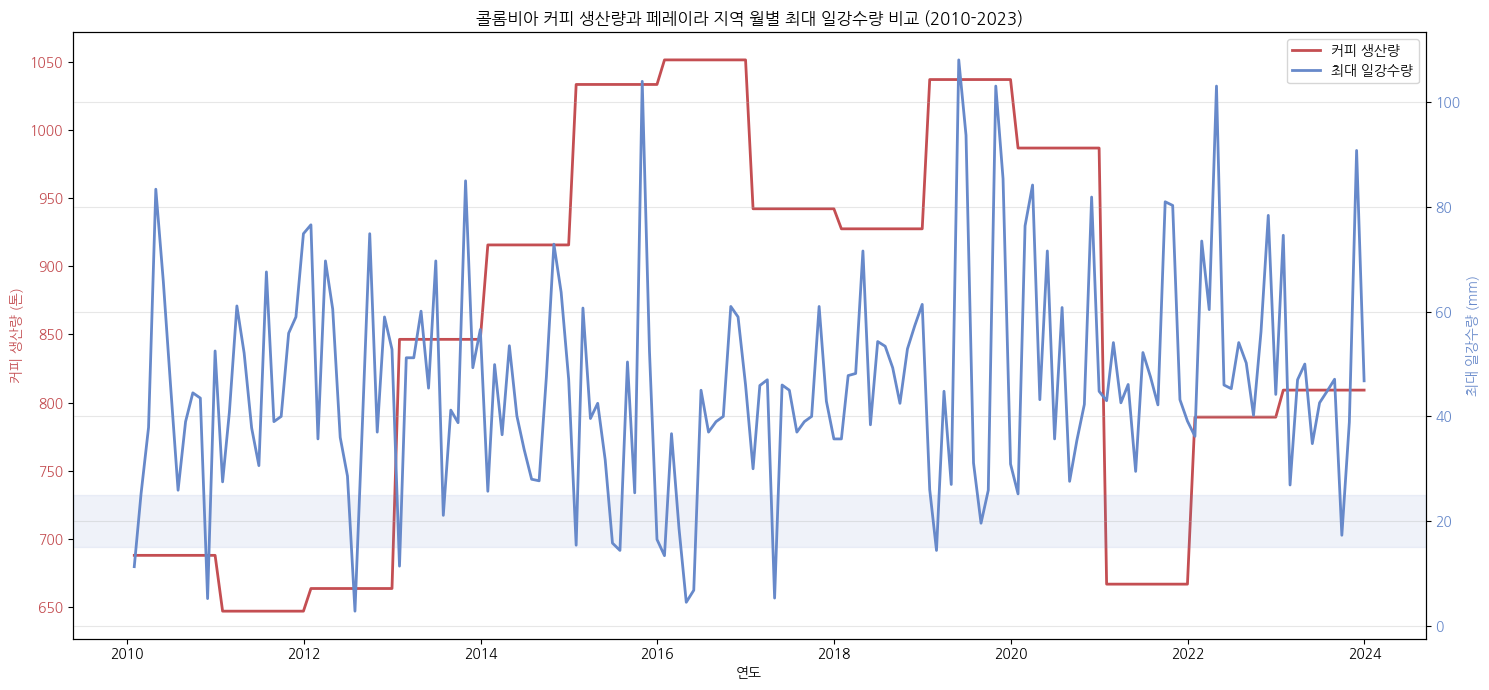

In [944]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(15, 7))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï

# Ïª§Ìîº ÏÉùÏÇ∞Îüâ Í∑∏ÎûòÌîÑ (ÏôºÏ™Ω yÏ∂ï)
ax1 = plt.gca()  # ÌòÑÏû¨ Axes Í∞ùÏ≤¥Î•º ÏñªÏñ¥ÏòµÎãàÎã§.
line1 = ax1.plot(coffee_monthly_filtered.index, coffee_monthly_filtered['Value'], 
                 '#C44E52', label='Ïª§Ìîº ÏÉùÏÇ∞Îüâ', linewidth=2)  # Ïª§Ìîº ÏÉùÏÇ∞Îüâ Í∑∏ÎûòÌîÑÎ•º ÌååÎûÄÏÉâÏúºÎ°ú Í∑∏Î¶ΩÎãàÎã§.
ax1.set_xlabel('Ïó∞ÎèÑ')  # xÏ∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
ax1.set_ylabel('Ïª§Ìîº ÏÉùÏÇ∞Îüâ (ÌÜ§)', color='#C44E52')  # ÏôºÏ™Ω yÏ∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï (ÌååÎûÄÏÉâ)
ax1.tick_params(axis='y', labelcolor='#C44E52')  # ÏôºÏ™Ω yÏ∂ïÏùò tick ÏÉâÏÉÅÏùÑ ÌååÎûÄÏÉâÏúºÎ°ú ÏÑ§Ï†ï

# Îëê Î≤àÏß∏ yÏ∂ï ÏÉùÏÑ±
ax2 = ax1.twinx()  # Ïò§Î•∏Ï™Ω yÏ∂ïÏùÑ Ï∂îÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ twin axes ÏÉùÏÑ±

# ÏµúÏ†Å Í∞ïÏàòÎüâ yÏ∂ï Î≤îÏúÑÏóê ÏÉâÏÉÅ ÌëúÏãú (20-25 Î≤îÏúÑ)
ax2.axhspan(15, 25, color='#6789CA', alpha=0.1)  # 20-25 Î≤îÏúÑÏóê Îπ®Í∞ÑÏÉâ Î∞∞Í≤Ω Ï∂îÍ∞Ä

# ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ Í∑∏ÎûòÌîÑ (Ïò§Î•∏Ï™Ω yÏ∂ï)
line2 = ax2.plot(rain_filtered.index, rain_filtered['ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ'], 
                 '#6789CA', label='ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ', linewidth=2)  # ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ Í∑∏ÎûòÌîÑÎ•º Îπ®Í∞ÑÏÉâÏúºÎ°ú Í∑∏Î¶ΩÎãàÎã§.
ax2.set_ylabel('ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ (mm)', color='#6789CA')  # Ïò§Î•∏Ï™Ω yÏ∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï (Îπ®Í∞ÑÏÉâ)
ax2.tick_params(axis='y', labelcolor='#6789CA')  # Ïò§Î•∏Ï™Ω yÏ∂ïÏùò tick ÏÉâÏÉÅÏùÑ Îπ®Í∞ÑÏÉâÏúºÎ°ú ÏÑ§Ï†ï

# xÏ∂ï ÏÑ§Ï†ï
plt.xticks(rotation=45)  # xÏ∂ï Î†àÏù¥Î∏îÏùÑ 45ÎèÑ ÌöåÏ†ÑÏãúÏºúÏÑú Í∞ÄÎèÖÏÑ±ÏùÑ ÎÜíÏûÖÎãàÎã§.

# Î≤îÎ°Ä Ìï©ÏπòÍ∏∞
lines = line1 + line2  # Ïª§Ìîº ÏÉùÏÇ∞ÎüâÍ≥º ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ Í∑∏ÎûòÌîÑÏùò ÎùºÏù∏ÏùÑ Ìï©Ïπ®
labels = [l.get_label() for l in lines]  # Í∞Å ÎùºÏù∏Ïùò Î†àÏù¥Î∏îÏùÑ Ï∂îÏ∂ú
ax1.legend(lines, labels, loc='upper right')  # Î≤îÎ°ÄÎ•º Í∑∏ÎûòÌîÑÏùò Ïò§Î•∏Ï™Ω ÏÉÅÎã®Ïóê ÏúÑÏπòÏãúÌÇ¥

# Í∑∏ÎûòÌîÑ Ï†úÎ™©Í≥º Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
plt.title('ÏΩúÎ°¨ÎπÑÏïÑ Ïª§Ìîº ÏÉùÏÇ∞ÎüâÍ≥º ÌéòÎ†àÏù¥Îùº ÏßÄÏó≠ ÏõîÎ≥Ñ ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ ÎπÑÍµê (2010-2023)')  # Ï†úÎ™© ÏÑ§Ï†ï
plt.grid(True, alpha=0.3)  # Î∞∞Í≤Ω Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä (Î∂àÌà¨Î™ÖÎèÑ 0.3ÏúºÎ°ú ÏÑ§Ï†ï)
plt.tight_layout()  # Î†àÏù¥ÏïÑÏõÉÏù¥ Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÏûêÎèôÏúºÎ°ú Ï°∞Ï†ï
plt.show()  # Í∑∏ÎûòÌîÑ Ï∂úÎ†•

<pre>
üìà Ï£ºÏöî Í¥ÄÏ∞∞Ï†ê
Ï†ÑÎ∞òÏ†ÅÏù∏ Ï∂îÏÑ∏

**Ïª§Ìîº ÏÉùÏÇ∞Îüâ(ÌååÎûÄÏÉâ ÏÑ†)**ÏùÄ 2013ÎÖÑ Ïù¥ÌõÑ Ï†êÏßÑÏ†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÑ.
**Í∞ïÏàòÎüâ(Îπ®Í∞ÑÏÉâ ÏÑ†)**ÏùÄ Î≥ÄÎèôÏÑ±Ïù¥ Îß§Ïö∞ ÌÅ¨Î©∞, ÌäπÏ†ï Í∏∞Í∞Ñ(2016ÎÖÑ, 2020ÎÖÑ, 2023ÎÖÑ)Ïóê Í∏âÍ≤©Ìïú Ï¶ùÍ∞ÄÍ∞Ä ÏûàÏùå.
ÌäπÏ†ï Ïó∞ÎèÑÎ≥Ñ ÌäπÏßï

2010-2012ÎÖÑ: Í∞ïÏàòÎüâÏù¥ Îß§Ïö∞ Î∂àÍ∑úÏπôÌïòÎ©∞, Ïª§Ìîº ÏÉùÏÇ∞ÎüâÎèÑ ÎπÑÍµêÏ†Å ÎÇÆÏùÄ ÏàòÏ§Ä Ïú†ÏßÄ.
2013-2015ÎÖÑ: Ïª§Ìîº ÏÉùÏÇ∞ÎüâÏù¥ Ï†êÏßÑÏ†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÌïòÎäî ÎèôÏïà Í∞ïÏàòÎüâÏùÄ Î≥ÄÎèôÏù¥ Ïã¨Ìï®.
2016ÎÖÑ: Í∞ïÏàòÎüâÏù¥ Í∏âÎì±Ìïú ÏãúÍ∏∞Í∞Ä ÎßéÏúºÎ©∞, Ïª§Ìîº ÏÉùÏÇ∞ÎüâÎèÑ Í∏âÍ≤©Ìïú Î≥ÄÌôîÍ∞Ä ÏûàÏùå.
2019-2020ÎÖÑ: Í∞ïÏàòÎüâÏù¥ Ï§ÑÏñ¥Îì§Î©¥ÏÑú, Ïª§Ìîº ÏÉùÏÇ∞ÎüâÏùÄ ÏïàÏ†ïÏ†ÅÏù∏ Ï¶ùÍ∞ÄÏÑ∏ Ïú†ÏßÄ.
2022-2023ÎÖÑ: Í∞ïÏàòÎüâÏù¥ Í∏âÎ≥ÄÌïòÎ©¥ÏÑú, ÏùºÎ∂Ä Íµ¨Í∞ÑÏóêÏÑú Ïª§Ìîº ÏÉùÏÇ∞ÎüâÏù¥ Í∞êÏÜåÌïòÎäî Ìå®ÌÑ¥Ïù¥ Î≥¥ÏûÑ.
Í∞ïÏàòÎüâÍ≥º Ïª§Ìîº ÏÉùÏÇ∞ÎüâÏùò Í¥ÄÍ≥Ñ

2016ÎÖÑÍ≥º 2023ÎÖÑ: Í∞ïÏàòÎüâÏù¥ Í∏âÏ¶ùÌï† Îïå, Ïª§Ìîº ÏÉùÏÇ∞ÎüâÏù¥ Î≥ÄÎèôÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÑ.
Í∞ïÏàòÎüâÏù¥ ÏùºÏ†ï ÏàòÏ§Ä Ïù¥Ìïò(Î∂âÏùÄ ÏùåÏòÅ ÏòÅÏó≠)Î°ú ÎÇÆÏïÑÏßà Í≤ΩÏö∞: Ïª§Ìîº ÏÉùÏÇ∞ÎüâÏù¥ Ïú†ÏßÄÎêòÍ±∞ÎÇò Ï¶ùÍ∞ÄÌïòÎäî Î™®ÏäµÏù¥ ÎÇòÌÉÄÎÇ®.
</pre>

- 2010ÎÖÑ 11Ïõî
Î©îÎç∞ÏßÑÏãú Ïù∏Í∑ºÏóêÏÑú ÏÇ∞ÏÇ¨ÌÉúÎ°ú ÏïΩ 150Î™ÖÏù¥ Îß§Î™∞ÎêòÎäî Îì± ÌîºÌï¥Í∞Ä Ïã¨Í∞ÅÌñàÏäµÎãàÎã§. 
OVERSEAS.MOFA.GO.KR

- 2017ÎÖÑ 3Ïõî
ÏΩúÎ°¨ÎπÑÏïÑ ÎÇ®ÏÑúÎ∂ÄÏùò Î™®ÏΩîÏïÑ ÏãúÏóêÏÑú Ìè≠Ïö∞Î°ú ÏÇ∞ÏÇ¨ÌÉúÍ∞Ä Î∞úÏÉùÌïòÏó¨ 333Î™ÖÏù¥ ÏÇ¨ÎßùÌïòÍ≥† ÏàòÎ∞± Î™ÖÏù¥ Ïã§Ï¢ÖÎêòÏóàÏäµÎãàÎã§. 
STARTNETWORK.ORG

- 2021ÎÖÑ 11Ïõî
ÏΩúÎ°¨ÎπÑÏïÑ ÎÇ®ÏÑúÎ∂Ä ÏßÄÏó≠ÏóêÏÑú Î©∞Ïπ† Í∞ÑÏùò Ìè≠Ïö∞Î°ú ÏÇ∞ÏÇ¨ÌÉúÍ∞Ä Î∞úÏÉùÌïòÏó¨ ÏµúÏÜå 6Î™ÖÏù¥ ÏÇ¨ÎßùÌïòÍ≥† 11Î™ÖÏù¥ Î∂ÄÏÉÅÌñàÏúºÎ©∞, 20Ïó¨ Î™ÖÏù¥ Ïã§Ï¢ÖÎêòÏóàÏäµÎãàÎã§.

- 2022ÎÖÑ 2Ïõî
ÏΩúÎ°¨ÎπÑÏïÑ Ï§ëÏÑúÎ∂Ä ÌéòÎ†àÏù¥ÎùºÏôÄ ÎèÑÏä§ÏºÄÎ∏åÎùºÎã§Ïä§ ÏßÄÏó≠ÏóêÏÑú Ìè≠Ïö∞Î°ú Ïù∏Ìïú ÏÇ∞ÏÇ¨ÌÉúÎ°ú ÏµúÏÜå 14Î™ÖÏù¥ ÏÇ¨ÎßùÌïòÍ≥† 30Ïó¨ Î™ÖÏù¥ Î∂ÄÏÉÅÌïú ÏÇ¨Í±¥Ïù¥ ÏûàÏóàÏäµÎãàÎã§.

- 2023ÎÖÑ 1Ïõî
ÏΩúÎ°¨ÎπÑÏïÑ Î∂ÅÏÑúÎ∂Ä Ï¥àÏΩîÏ£ºÏôÄ ÏïàÌã∞Ïò§ÌÇ§ÏïÑÏ£ºÎ•º ÏûáÎäî ÎèÑÎ°úÏóêÏÑú ÏÇ∞ÏÇ¨ÌÉúÍ∞Ä Î∞úÏÉùÌïòÏó¨ ÏµúÏÜå 33Î™ÖÏù¥ ÏÇ¨ÎßùÌñàÏäµÎãàÎã§.

* Ïù¥Îü¨Ìïú ÏÇ¨Í±¥Îì§ÏùÄ ÏΩúÎ°¨ÎπÑÏïÑÏóêÏÑú Ìè≠Ïö∞Î°ú Ïù∏Ìïú ÏÇ∞ÏÇ¨ÌÉúÏôÄ ÌôçÏàòÎ°ú Ïù∏Î™Ö ÌîºÌï¥Í∞Ä Î∞úÏÉùÌïú Ï£ºÏöî ÏÇ¨Î°ÄÎì§ÏûÖÎãàÎã§.

In [945]:
coffee_price = pd.read_excel('data/Ïª§Ìîº_ÏõêÎëê_Í∞ÄÍ≤©_Ìï©Î≥∏.xlsx')
# UTC_rain = data[['ÏãúÍ∞Ñ(UTC)','ÏµúÎåÄ ÏùºÍ∞ïÏàòÎüâ']]

In [946]:
coffee_price.head()

Í∏∞Í∞Ñ(ÎÖÑ)     ÌèâÍ∑†Í∞Ä   Ï†ÑÎÖÑÌèâÍ∑†Í∞Ä    Ï†ÑÎÖÑÎåÄÎπÑ  Îì±ÎùΩÎ•†(%)      Ï¢ÖÍ∞Ä  ÌôòÏÇ∞Í∞Ä($/ton)
0   2010  213.19    0.00  213.19    0.00  240.50     4699.99
1   2011  253.64  213.19   40.45   18.97  226.85     5591.75
2   2012  175.58  253.64  -78.06  -30.78  143.80     3870.84
3   2013  126.58  175.58  -49.00  -27.91  110.70     2790.58
4   2014  177.84  126.58   51.26   40.50  166.60     3920.66

Í∏∞Í∞Ñ(ÎÖÑ)     ÌèâÍ∑†Í∞Ä
0    2010  213.19
1    2011  253.64
2    2012  175.58
3    2013  126.58
4    2014  177.84
5    2015  132.48
6    2016  136.21
7    2017  132.96
8    2018  112.65
9    2019  101.70
10   2020  111.38
11   2021  168.54
12   2022  214.45
13   2023  172.43
14   2024  233.96
15   2025  345.15

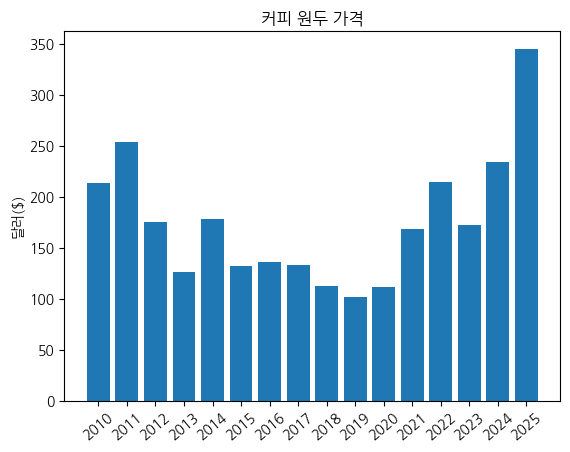

In [947]:
coffee_price = coffee_price[['Í∏∞Í∞Ñ(ÎÖÑ)','ÌèâÍ∑†Í∞Ä']]
display(coffee_price)
plt.bar(coffee_price['Í∏∞Í∞Ñ(ÎÖÑ)'], coffee_price['ÌèâÍ∑†Í∞Ä'])

plt.xticks(coffee_price['Í∏∞Í∞Ñ(ÎÖÑ)'], rotation=40)
plt.ylabel('Îã¨Îü¨($)')
plt.title('Ïª§Ìîº ÏõêÎëê Í∞ÄÍ≤©')

plt.show()